# Faculty_Notebook-Day01

### K - Means

K-means algorithm is the most popular and yet simplest of all the clustering algorithms.

- Select the number of clusters  k  that you think is the optimal number.
- Initialize  k  points as "centroids" randomly within the space of our data.
- Attribute each observation to its closest centroid.
- Update the centroids to the center of all the attributed set of observations.
- Repeat steps 3 and 4 a fixed number of times or until all of the centroids are stable (i.e. no longer change in step 4).
- This algorithm is easy to describe and visualize. Let's take a look.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 


In [2]:
df = pd.read_csv("iris.csv",header=None,names=['SL','SW','PL','PW','CLASS'])

In [3]:
df.head()

,SL,SW,PL,PW,CLASS
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['CLASS'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: CLASS, dtype: int64

In [5]:
df_rows , df_cols = df.shape
print(df_rows)
print(df_cols)

150
5


In [6]:
df2 = df.loc[:, 'SL':'PW']

In [7]:
df2.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


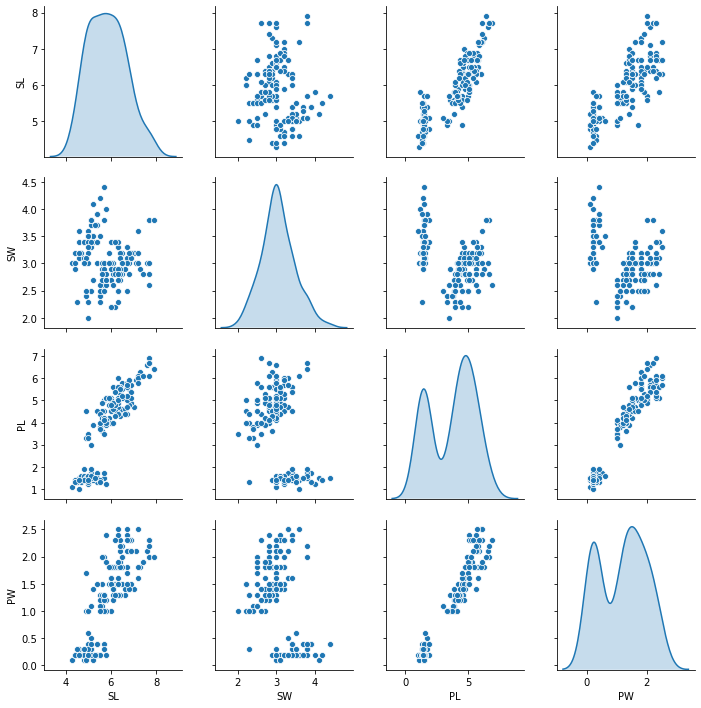

In [8]:
import seaborn as sns
sns.pairplot(df2,diag_kind='kde')

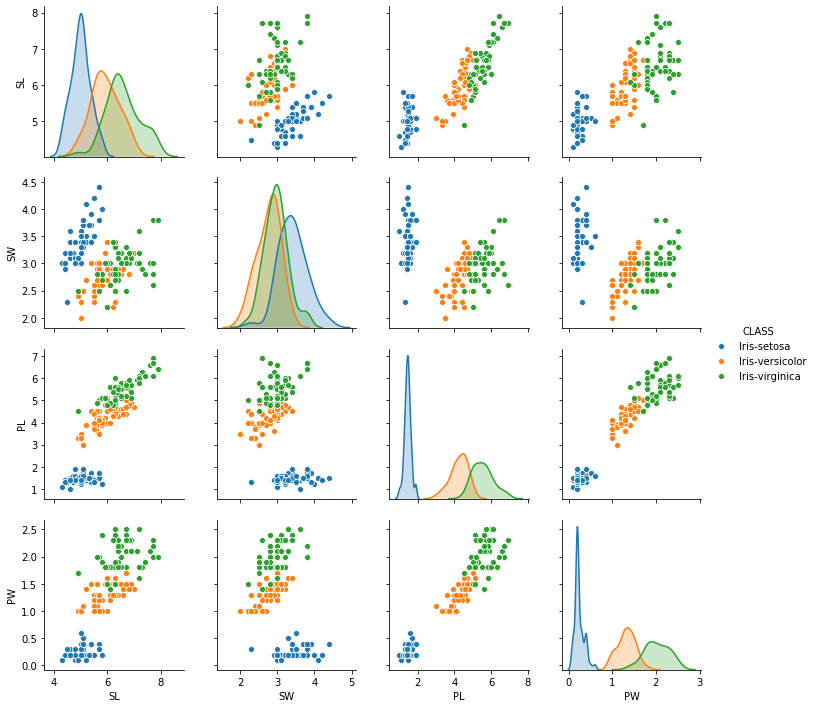

In [9]:
sns.pairplot(df,diag_kind='kde',hue ='CLASS')

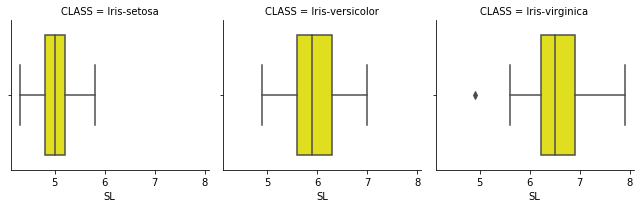

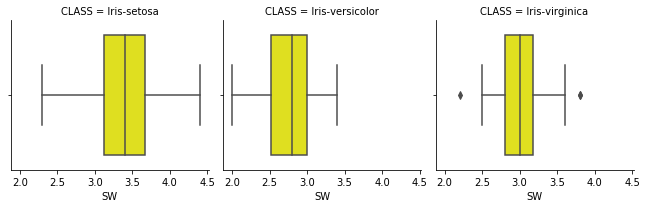

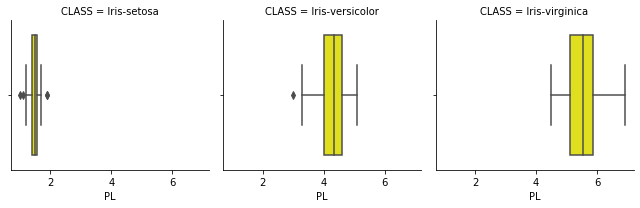

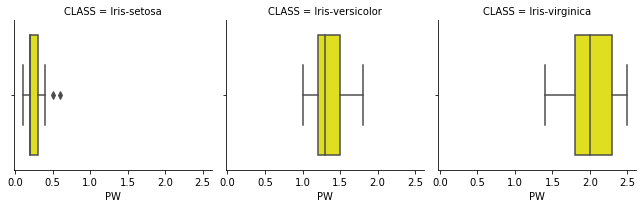

In [73]:
a = sns.FacetGrid(df,col ='CLASS')
a.map(sns.boxplot,'SL',color ='yellow',order =['0','1','2'])
plt.show()

a = sns.FacetGrid(df,col ='CLASS')
a.map(sns.boxplot,'SW',color ='yellow',order =['0','1','2'])
plt.show()

a = sns.FacetGrid(df,col ='CLASS')
a.map(sns.boxplot,'PL',color ='yellow',order =['0','1','2'])
plt.show()

a = sns.FacetGrid(df,col ='CLASS')
a.map(sns.boxplot,'PW',color ='yellow',order =['0','1','2'])
plt.show()

In [10]:
df_scaled = df2.apply(zscore)

In [11]:
df_scaled.head() 

,SL,SW,PL,PW
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [48]:
model = KMeans(n_clusters = 3)

In [49]:
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [74]:
clusters.inertia_ 

35.27263058340414

In [50]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )#, n_init = 10
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,600.000000
1,2,223.732006
2,3,141.141460
3,4,114.551177
4,5,91.111019
5,6,80.249722
6,7,72.073298
7,8,63.226703
8,9,54.300595
9,10,48.104088


The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

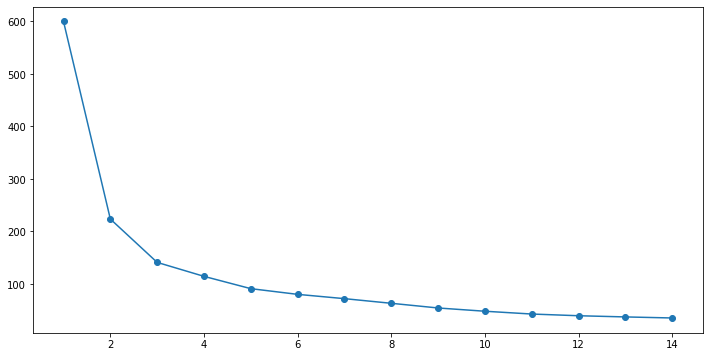

In [51]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [52]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)

In [53]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2345, tol=0.0001, verbose=0)

In [54]:
centroids = kmeans.cluster_centers_

In [55]:
centroids

array([[-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 1.13597027,  0.09659843,  0.996271  ,  1.01717187],
       [-0.05021989, -0.88029181,  0.34753171,  0.28206327]])

In [56]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [57]:
centroid_df

,SL,SW,PL,PW
0,-1.014579,0.842307,-1.304878,-1.255129
1,1.135970,0.096598,0.996271,1.017172
2,-0.050220,-0.880292,0.347532,0.282063


kmeans.labels_
pd.DataFrame(kmeans.labels_, columns = "label")

In [102]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
print(df_labels)
df_labels['labels'] = df_labels['labels'].astype('category')

     labels
0         0
1         0
2         0
3         0
4         0
..      ...
145       1
146       2
147       1
148       1
149       2

[150 rows x 1 columns]


In [59]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
snail_df_labeled = df2.join(df_labels)

In [60]:
snail_df_labeled.head()

,SL,SW,PL,PW,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [61]:
df_analysis = (snail_df_labeled.groupby(['labels'] , axis=0)).head(4177)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. I am using .head(30000) for that
df_analysis

,SL,SW,PL,PW,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [62]:
snail_df_labeled['labels'].value_counts()   #0-Infant, 1-Female, 2-Male

2    53
0    50
1    47
Name: labels, dtype: int64

In [63]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

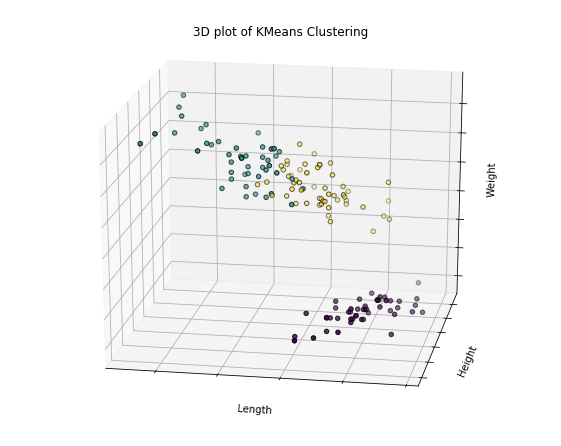

In [64]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
kmeans.fit(df_scaled)
labels = kmeans.labels_
ax.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], df_scaled.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')


## sns.pairplot(snail_df_labeled,diag_kind ='hist',hue = 'labels')

In [65]:
snail_df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   SL      150 non-null    float64 
 1   SW      150 non-null    float64 
 2   PL      150 non-null    float64 
 3   PW      150 non-null    float64 
 4   labels  150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [76]:
df_labeled = df_scaled.join(df_labels)

In [77]:
iris_clusters =df_labeled.groupby(['labels'])
df0 = iris_clusters.get_group(0)
df1 = iris_clusters.get_group(1)
df2 = iris_clusters.get_group(2)

In [80]:
c0 = kmeans.cluster_centers_[0,:]
c1 = kmeans.cluster_centers_[1,:]
c2 = kmeans.cluster_centers_[2,:]

In [83]:
I0 =0
I1=0
I2 =0

In [84]:
for i in np.arange(df0.shape[0]):
   I0 = I0+np.sum((df0.iloc[i,:-1]-c0)**2)# sum of squared distance within a cluster  is called inertia, in that cluster.
for i in np.arange(df1.shape[0]):
   I1 = I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):
   I2 = I2+np.sum((df2.iloc[i,:-1]-c2)**2)

In [85]:
I0+I1+I2

140.96581663074699

heirarchy

In [86]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [88]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]],size =[100,])
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]],size =[100,])
x =np.concatenate((a,b))
x.shape

(200, 2)

plot the graph

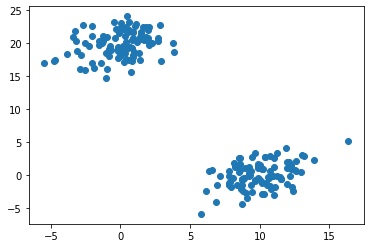

In [89]:
plt.scatter(x[:,0],x[:,1])

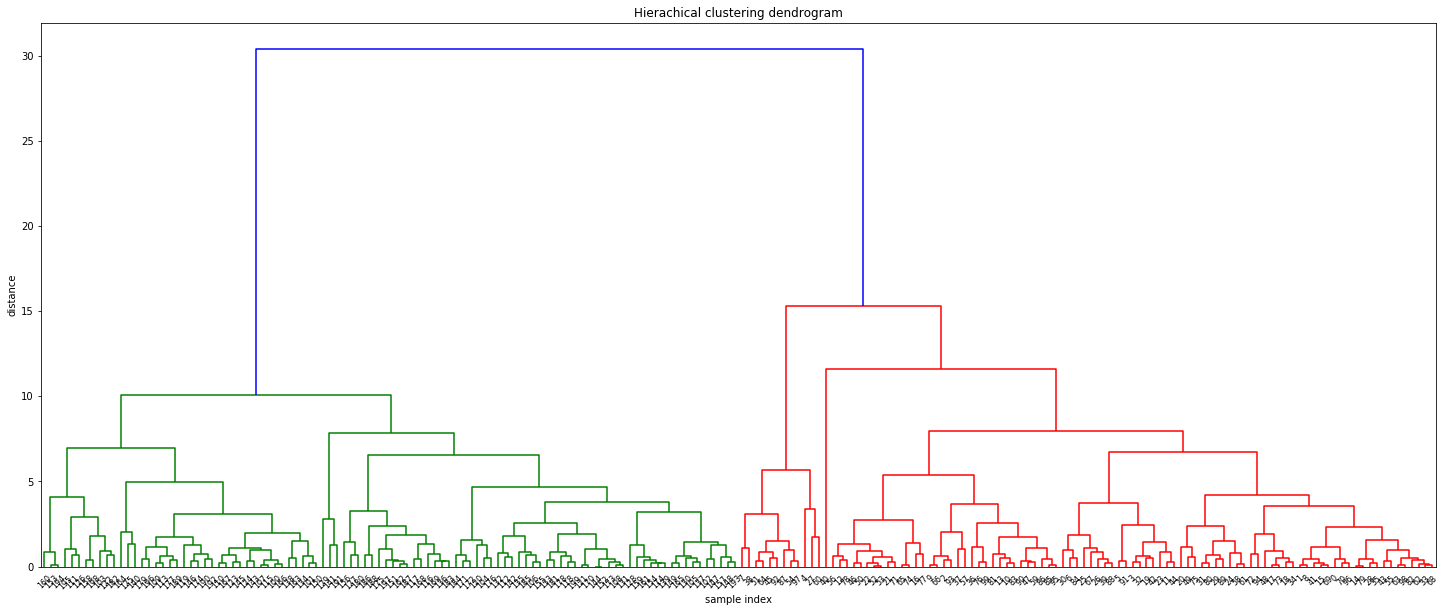

In [92]:
z = linkage(x,'complete')

plt.figure(figsize=(25,10))
plt.title('Hierachical clustering dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(z,leaf_rotation=45,leaf_font_size=8)
plt.show()

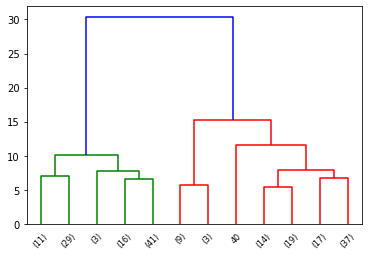

In [101]:
dendrogram(z,leaf_rotation=45,leaf_font_size=8,truncate_mode='lastp',p =12)
plt.show()